In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('tips.csv')

data.head(5)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [2]:
data.total_bill.max()

50.81

In [3]:
%matplotlib inline

<AxesSubplot:>

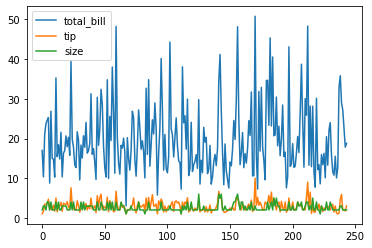

In [4]:
data.plot()

<AxesSubplot:ylabel='Frequency'>

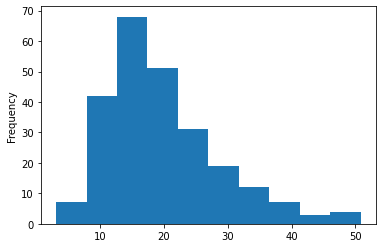

In [5]:
data.total_bill.plot(kind='hist')

In [6]:
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
133,12.26,2.00,Female,No,Thur,Lunch,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


<AxesSubplot:title={'center':'Кол-во посетителей по дням'}>

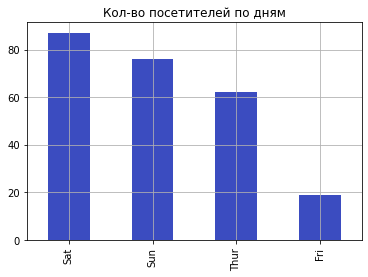

In [7]:
data['day'].value_counts().plot(kind='bar', grid='True', colormap ='coolwarm', title="Кол-во посетителей по дням")

array([<AxesSubplot:title={'center':'Сумма чека'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Чаевые'}, ylabel='Frequency'>],
      dtype=object)

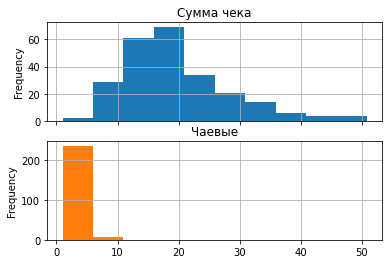

In [8]:
data[['total_bill','tip']].plot(kind='hist', subplots= True, title=['Сумма чека','Чаевые'],legend= False, grid=True)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

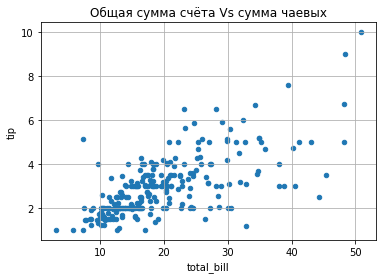

In [9]:
data.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

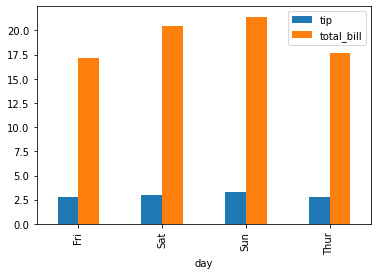

In [10]:
data.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind='bar')

<AxesSubplot:xlabel='sex,smoker'>

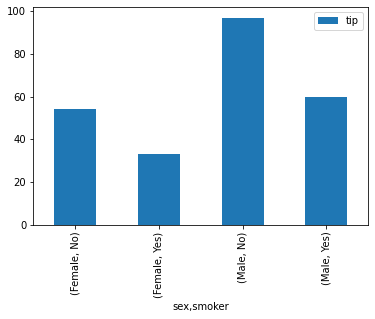

In [11]:
data.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind='bar')

среднюю сумму чаевых, которые оставляют курящие и некурящие посетители

In [12]:
data.pivot_table(values='tip',index='smoker',aggfunc='mean')

,tip
smoker,
No,2.991854
Yes,3.008710


In [13]:
data.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

Создание графиков с matplotlib

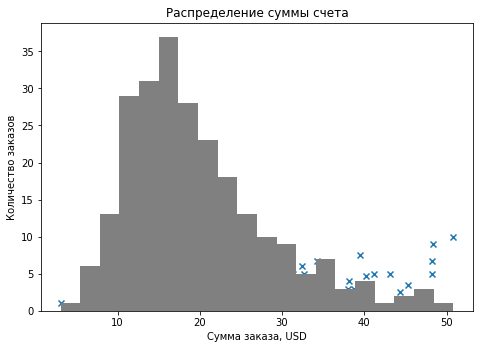

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(data['total_bill'],bins = 20, color = 'gray')
axes.set_title('Распределение суммы счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')
axes.scatter(x = data.total_bill, y = data.tip, marker = 'x')

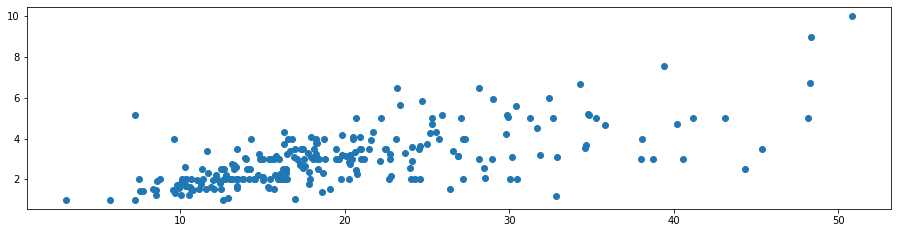

In [15]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,0.7])
axes.scatter(x = data.total_bill, y = data.tip, marker = 'o')

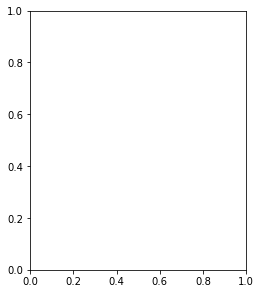

In [16]:
fig2 = plt.figure()
axes = fig2.add_axes([0.2, 0.2, 0.5, 0.9])

 основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

In [17]:
max_by_day = data.groupby(by='day').total_bill.max()
min_by_day = data.groupby(by='day').total_bill.min()

<BarContainer object of 4 artists>

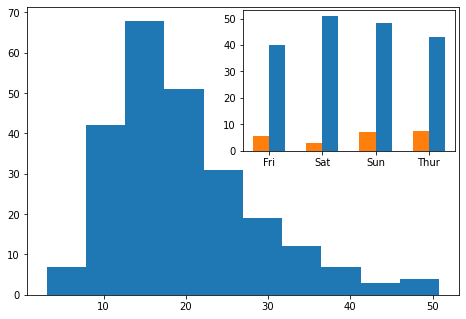

In [34]:
fig3 = plt.figure()
fig3_axes = fig3.add_axes([0,0,1,1])
fig3_axes.hist(data.total_bill)
fig3_small_axes = fig3.add_axes([0.5,0.5,0.49,0.49])
fig3_small_axes.bar(x = max_by_day.index, height = max_by_day.values, width = 0.3, align = 'edge')
fig3_small_axes.bar(x = min_by_day.index, height = min_by_day.values, width = -0.3, align = 'edge')


In [27]:
max_by_day.index

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')